In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/feature selection/after data augmentation/data/augmented_cwgan_beta_severity_lfc_1_nosm_fake_neighbor_vectors_all.csv')

# input and output variables splitting
y = data.iloc[:, -1].values
X = data.iloc[:, :-1].values
print(X.shape)

rfc = RandomForestClassifier(max_depth=100, random_state=42)
clf = RFECV(rfc, step=1, cv=5)
clf.fit(X, y)

print("Optimal number of features : ", clf.n_features_)

print(clf.ranking_)


(563, 916)
Optimal number of features :  815
[ 99  98  96  95   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1  68   1   1
   1   1   1   1   1   1   1   1  60   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1  45   1   1   1
   1   1   1   1   1   1   1   1  30   1   1   1   1   1   1   1   1   1
   1   1   1   1  88  61   1   1   1   1 101   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1  79   1   1   1   1   1   1   1   1
  27  

In [ ]:
#printing some optimal features
selected_feature_indices = np.where(clf.support_)[0]

optimal_features = data.columns[selected_feature_indices]

print("Optimal features: ", optimal_features)
optimal_features_df = pd.DataFrame({'Optimal Features': optimal_features})

optimal_features_df.to_csv('/content/drive/MyDrive/thesis/Redo/feature selection/after data augmentation/data/cwgan_beta_severity_lfc_1_nosm_optimal_features_after_DA.csv', index=False)

Optimal features:  Index(['UPP2', 'CEACAM21', 'CEACAM7', 'TKTL1', 'TEAD3', 'PGLYRP1', 'CD4',
       'LTF', 'MAMLD1', 'CD6',
       ...
       'RHEX', 'ANXA8L1', 'NBPF15', 'NFILZ', 'LOC122539214', 'ARHGAP19.SLIT1',
       'CD24', 'DOC2B', 'ANTXRL', 'ZNF280B'],
      dtype='object', length=815)


In [ ]:
#printing some features
selected_feature_indices = np.where(clf.support_)[0]

optimal_features = data.columns[selected_feature_indices]

np.set_printoptions(threshold=len(optimal_features))

print("Optimal features: ", optimal_features)

Optimal features:  Index(['UPP2', 'CEACAM21', 'CEACAM7', 'TKTL1', 'TEAD3', 'PGLYRP1', 'CD4',
       'LTF', 'MAMLD1', 'CD6',
       ...
       'RHEX', 'ANXA8L1', 'NBPF15', 'NFILZ', 'LOC122539214', 'ARHGAP19.SLIT1',
       'CD24', 'DOC2B', 'ANTXRL', 'ZNF280B'],
      dtype='object', length=815)


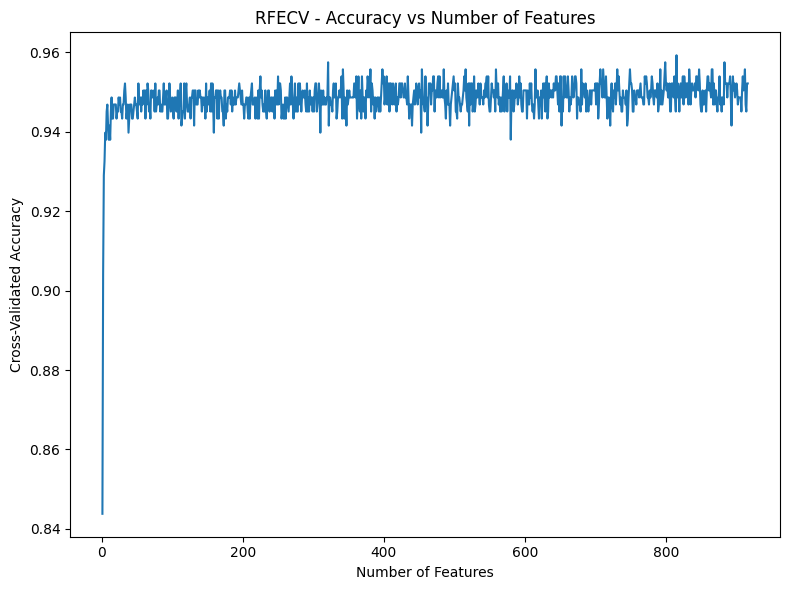

In [ ]:
#relationship between the number of features used in the RandomForestClassifier and the corresponding cross-validated
# accuracy during the RFECV (Recursive Feature Elimination with Cross-Validation) process
# Plot accuracy versus number of features
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(clf.cv_results_['mean_test_score']) + 1), clf.cv_results_['mean_test_score'])
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFECV - Accuracy vs Number of Features")
plt.tight_layout()
plt.show()

Top 15 Important Features:
UPP2: 0.026651549137848306
ACVR2A: 0.025748732661329182
TCTN2: 0.023847937460530044
AMOT: 0.02340808837472292
DYNC2H1: 0.02322692079010276
NTN4: 0.023184815156895012
PPP2R2B: 0.022117843607090747
IKZF2: 0.021903066086755914
PTCH1: 0.021556690251108655
NECTIN3: 0.02061456091174266
ZNF831: 0.01997740946370906
SGSM1: 0.019151207833577474
HHAT: 0.01686910192703459
SPON1: 0.015885823758127665
PHLDB2: 0.015664401268191793


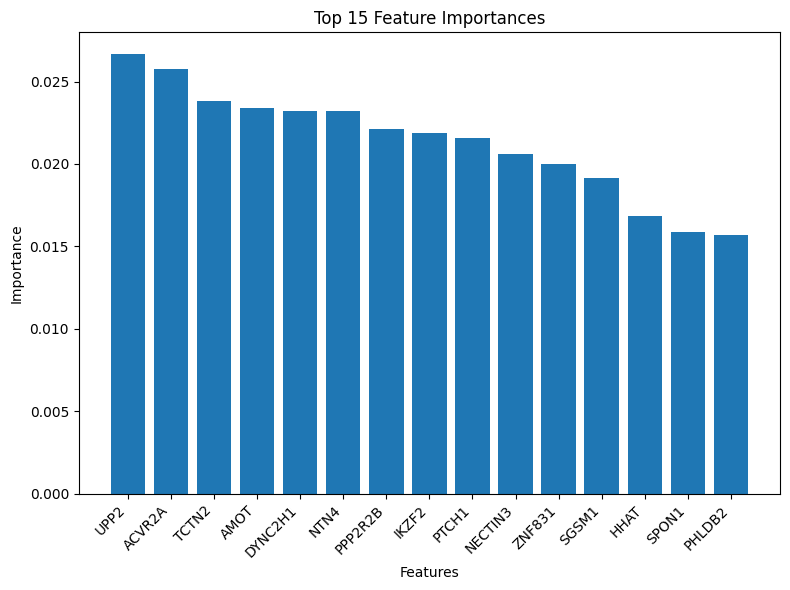

In [ ]:
# Thee top 15 important features
top_15_indices = np.argsort(feature_importances)[::-1][:15]

top_15_features = optimal_features[top_15_indices]
top_15_importances = feature_importances[top_15_indices]

print("Top 15 Important Features:")
for feature, importance in zip(top_15_features, top_15_importances):
    print(f"{feature}: {importance}")


# Plotting
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_15_features)), top_15_importances)
plt.xticks(range(len(top_15_features)), top_15_features, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()